#scipy.stats 는 기본적인 T-test 와 교차검정, 정규성검정, 등분산성 검정, 일원배치 분산분석 등 간단한 분석만 가능함
# statemodel 은 사후 검정과 상호작용효과 등 전문적인 통계분석 도구임

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
cats = pd.read_csv('/content/drive/MyDrive/datasets/cats.csv')
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  144 non-null    int64  
 1   Sex         144 non-null    object 
 2   Bwt         144 non-null    float64
 3   Hwt         144 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.6+ KB


#일표본 t-test 정규성 검정필요함
# 모평균의 값은 **이다.

In [3]:
import scipy.stats as stats
from scipy.stats import shapiro #정규성 검정
mu = 2.6
shapiro(cats['Bwt'])
#ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05) 로 정규성 검정결과 '데이터가 정규성을 따른다'는 귀무가설 기각됨으로 wilcoxon test를 시행
#만약 정규성 가설이 유의 수준이상이라면 t-test 진행

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)

In [4]:
#귀무가설 채택
stats.wilcoxon(cats.Bwt - mu, alternative = 'two-sided') #cats.Bwt - mu는 각 데이터 포인트에서 mu 값을 빼서, 데이터가 mu와 얼마나 다른지를 나타내는 새로운 데이터 세트를 생성
#WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093) 로 유의하므로 귀무가설인 고양이의 몸무게는 2.6 기각되고 연구가설이 채택됨

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [5]:
# 데이터가 정규분포라면 ttest
stats.ttest_1samp(cats.Bwt, popmean = mu)
# 유의 하므로 연구가설 채택(몸무게가 2.6이 아니다.)

TtestResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613, df=143)

#대응표본 t-test 정규성 검정필요함
# 두모평균의 차이검정(투약 전과 투약후의 차이가 있다)

In [6]:
import pandas as pd
data = {'before':[7,3,4,5,2,1,6,6,5,4],
        'after': [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
data = pd.DataFrame(data)
data


,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [7]:
print(shapiro(data['before'])) # 각자 정규성 검토해야됨
print(shapiro(data['after'])) # 두 데이터의 P 값이 유의수준 보다 크므로 귀무가설이 채택됨

ShapiroResult(statistic=0.9644591808319092, pvalue=0.835266649723053)
ShapiroResult(statistic=0.945683479309082, pvalue=0.6177965998649597)


In [14]:
stats.ttest_rel?

In [8]:
stats.ttest_rel(data['after'], data['before'], alternative = 'greater') # 유의 수준보다 작으므로 연구가설 채택
# alternative='two-sided' 양측 검정
# alternative='greater': 첫 번째 표본의 평균이 두 번째 표본의 평균보다 크다는 것을 검증,
#alternative='less': 첫 번째 표본의 평균이 두 번째 표본의 평균보다 작다는 것을 검증

TtestResult(statistic=4.743416490252569, pvalue=0.0005269356285082764, df=9)

In [9]:
from scipy.stats import wilcoxon
wilcoxon(data['before'], data['after']) #정규성가정 기각시  유의 수준보다 작으므로 연구가설 채택됨 두 모평균의 차이가 있다.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.00829921599528076)

#독립표본 t-test
## 두 집단간 차이가 없다.
## 정규성 검정과 등분산 검정이 필요함

In [10]:
import pandas as pd
cats = pd.read_csv('/content/drive/MyDrive/datasets/cats.csv')
cats.info()
female = cats.loc[cats.Sex == 'F', 'Bwt'] #cats DataFrame 내에서 성별(Sex)이 여성('F')인 행들 중에서 'Bwt' 열의 값을 선택
male = cats.loc[cats.Sex == 'M', 'Bwt'] # np.where(cats[Sex]=='F', 1, 0)으로 하면 한 열에 1, 0 으로 변환되어 새로운 배열이 생성되기 때문에 t-test나 anova 분석을할 수  없음 따라서 두집단으로 분리하여 검정해야됨
stats.levene(female,male)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  144 non-null    int64  
 1   Sex         144 non-null    object 
 2   Bwt         144 non-null    float64
 3   Hwt         144 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.6+ KB


LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [11]:
stats.ttest_ind(female, male, equal_var = False)# 등분산 가정이 충족되지 않으므로 equal_var = False로 하여 검정
#TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363) 로 p 값이 유의 수준 0.05 보다 작으므로 집단간 평균의 차이가 있음

TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

In [12]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


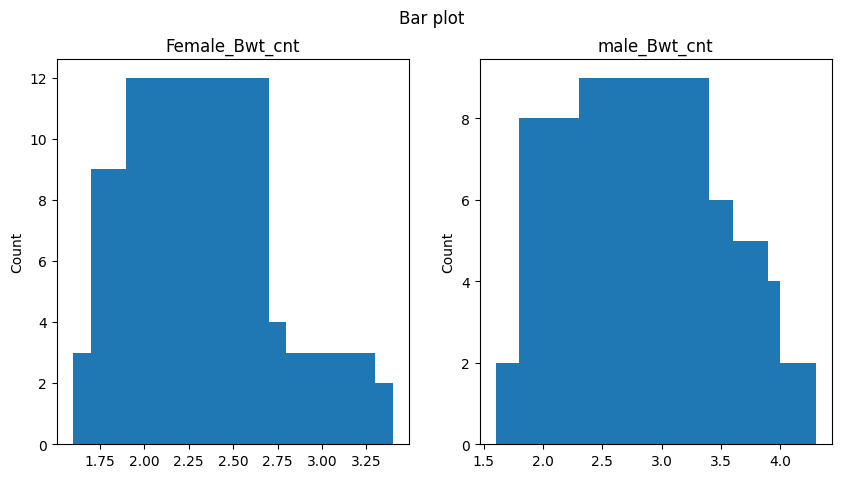

In [13]:
import matplotlib.pyplot as plt
female_Bwt_cnt = pd.value_counts(female.values, sort = False)
male_Bwt_cnt = pd.value_counts(male.values, sort = False)
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Bar plot')
width = 0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('Female_Bwt_cnt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt_cnt')
axs[1].set_ylabel('Count')
plt.show()